<a id='task1'></a>
# **Task 1 (30 points): CNNs and Transfer Learning**
**Dataset**: [Intel Image Classification (Natural Scenes)](https://www.kaggle.com/datasets/puneet6060/intel-image-classification). This dataset has images of size roughly 150\~200 px belonging to 6 classes of scenes: `buildings`, `forest`, `glacier`, `mountain`, `sea`, `street`.

### Steps to Follow
1. **Download, prepare, visualize** dataset.
2. **Create a convolutional base** with Conv + MaxPooling layers and a final Dense layer.
3. **Compile and train** the model, report metrics (e.g., accuracy, loss).
4. **Use Transfer Learning** with ResNet50, compare metrics.
5. **Add data augmentation**, re-train the original CNN model, and observe differences.


<a id='task1-part1'></a>
## **Part 1 (10 points): Custom CNN**
### Steps
1. **Data loading**: Use `tf.keras.preprocessing.image_dataset_from_directory` or `ImageDataGenerator` (older API) to load the dataset.
2. **Normalization**: Rescale pixel values.
3. **Build a CNN** with some pattern: a few Conv layers + MaxPooling. 
4. **Compile** with an optimizer (e.g., `Adam`) and a loss (e.g., `SparseCategoricalCrossentropy`).
5. **Train**, **evaluate**, and describe final metrics.
6. **Visualize** a few training images.

**Why this pattern?** Typically we choose a small number of Conv/Pool layers to keep the model from overfitting. The pattern might look like:
- Conv -> ReLU -> MaxPool
- Conv -> ReLU -> MaxPool
- Flatten -> Dense -> Output


/Users/colinfarley/Desktop/School/AI&ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


2025-03-17 14:50:26.156689: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


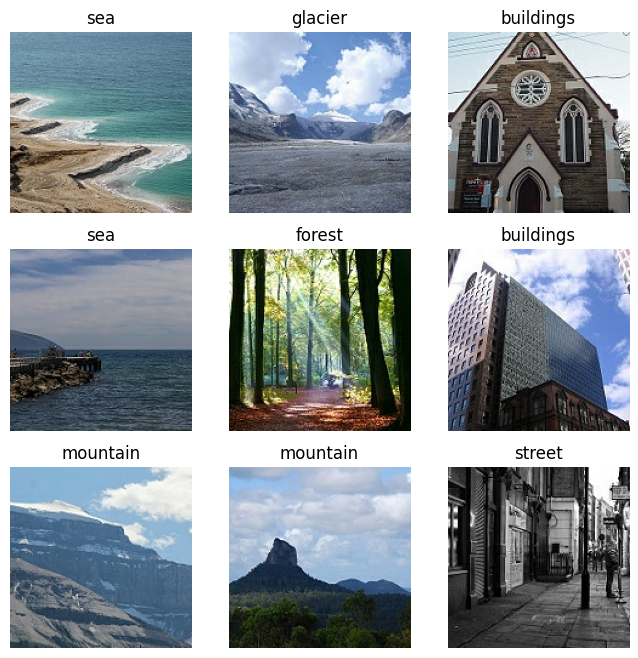

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np

train_dir = "archive/seg_train/seg_train" 
val_dir = "archive/seg_test/seg_test"      

batch_size = 32
img_size = (150, 150)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# A quick visualization of the data (just one batch)
class_names = train_ds.class_names

plt.figure(figsize=(8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [2]:
# Create a small CNN model
num_classes = 6  # buildings, forest, glacier, mountain, sea, street

model_cnn = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150,150,3)),  # or use a normalization layer

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_cnn.summary()


/Users/colinfarley/Desktop/School/AI&ML/.venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 5 
history_cnn = model_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Training complete.")

Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 47s 107ms/step - accuracy: 0.5388 - loss: 1.1792 - val_accuracy: 0.7450 - val_loss: 0.6928
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.7674 - loss: 0.6514 - val_accuracy: 0.8160 - val_loss: 0.5458
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.8309 - loss: 0.4745 - val_accuracy: 0.8010 - val_loss: 0.5815
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 109ms/step - accuracy: 0.8735 - loss: 0.3586 - val_accuracy: 0.8017 - val_loss: 0.6452
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.9164 - loss: 0.2345 - val_accuracy: 0.8013 - val_loss: 0.7667
Training complete.


### Evaluate and Describe Metrics
You could run `model_cnn.evaluate(val_ds)`, interpret the accuracy, and optionally test on a separate hold-out set. For brevity, we show how to evaluate on the validation set below:


In [4]:
val_loss, val_acc = model_cnn.evaluate(val_ds)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8463 - loss: 0.6373
Validation Loss: 0.7666593194007874
Validation Accuracy: 0.8013333082199097


## Part 1 Discussion

In this part, we built and trained a custom CNN on the Intel Image Dataset to classify images into 6 scene categories. The model’s architecture included three blocks of convolution + max pooling layers, followed by two dense layers. Below is a summary of the key observations and final metrics:

### Model Architecture

Total Parameters: 4,829,126
Layers: 3 convolutional layers (with increasing filters from 32 to 128), each followed by a max pooling layer, then flattened and passed through two dense layers (128 units, then an output layer of 6 units).
**Why This Pattern**: Stacking convolutional layers captures increasingly higher-level features, while pooling layers help reduce spatial dimensions and overfitting.
Training Progress

#### We trained for 5 epochs with accuracy and loss as metrics.
Epoch 1: Accuracy ~53.9%, Loss 1.1792.

Epoch 2: Accuracy ~76.7%, Loss 0.6514.

Epoch 3: Accuracy ~83.1%, Loss 0.4745.

Epoch 4: Accuracy ~87.4%, Loss 0.3586.

Epoch 5: Accuracy ~91.6%, Loss 0.2345.

Although training accuracy improved significantly (reaching ~91.6%), the validation accuracy stabilized around ~80%.

### Validation Results

Validation Accuracy: ~80.13%
Validation Loss: ~0.77
The gap between training accuracy and validation accuracy suggests some overfitting. In future experiments, regularization or more data augmentation might help.
Key Takeaways

The model quickly reached a high training accuracy but plateaued in validation accuracy near 80%.
The overall performance is still decent for this dataset, indicating that the chosen architecture can learn meaningful features.
The final reported metrics show room for improvement, such as adjusting hyperparameters, using data augmentation, or leveraging transfer learning (as we explore in Part 2).
Overall, this custom CNN demonstrates a solid baseline for the classification task on the Intel Image Dataset.

<a id='task1-part2'></a>
## **Part 2 (10 points): Transfer Learning with ResNet50**
We now pick **ResNet50** (a commonly used architecture) as our base for transfer learning.

### Steps
1. **Load a pre-trained ResNet50** (trained on ImageNet) via `tf.keras.applications.resnet50`.
2. **Freeze** the base layers or selectively unfreeze some.
3. **Add** a small classifier head at the end for our 6 classes.
4. **Train** for a few epochs, compare accuracy with Part 1.

**Comparison**: Are the results significantly different than the custom CNN? We typically expect better performance with large pre-trained networks (especially if the dataset is relatively small) because they provide rich feature extraction.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load the ResNet50 base
resnet_base = ResNet50(
    weights='imagenet',  
    include_top=False,   
    input_shape=(150,150,3)
)

# Freeze the base layers
for layer in resnet_base.layers:
    layer.trainable = False

# Build a model on top of ResNet50
model_resnet = Sequential([
    layers.InputLayer(input_shape=(150,150,3)),
    layers.Lambda(preprocess_input), 
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_resnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/Users/colinfarley/Desktop/School/AI&ML/.venv/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [6]:
# Train with a small number of epochs for demonstration
epochs = 5
history_resnet = model_resnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Evaluate on validation
val_loss_resnet, val_acc_resnet = model_resnet.evaluate(val_ds)
print("ResNet50 Validation Loss:", val_loss_resnet)
print("ResNet50 Validation Accuracy:", val_acc_resnet)


Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 123s 277ms/step - accuracy: 0.8716 - loss: 0.3689 - val_accuracy: 0.9177 - val_loss: 0.2217
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 122s 278ms/step - accuracy: 0.9328 - loss: 0.1835 - val_accuracy: 0.9053 - val_loss: 0.2676
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 121s 275ms/step - accuracy: 0.9487 - loss: 0.1386 - val_accuracy: 0.9273 - val_loss: 0.2011
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 122s 278ms/step - accuracy: 0.9595 - loss: 0.1103 - val_accuracy: 0.9177 - val_loss: 0.2146
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 120s 273ms/step - accuracy: 0.9668 - loss: 0.0873 - val_accuracy: 0.9207 - val_loss: 0.2348
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.9378 - loss: 0.1876
ResNet50 Validation Loss: 0.234803706407547
ResNet50 Validation Accuracy: 0.9206666946411133


### Part 2 Discussion

In this part, we applied **transfer learning** using ResNet50 (pre-trained on ImageNet) as our feature extractor. We added two dense layers (128 units, then 6 units) on top. Here are the key observations:

1. **Training Dynamics**  
   - The network reached a **validation accuracy** of **~92.1%** by the final epoch (vs. ~80.1% from our custom CNN).  
   - Notably, the training converged faster to a higher baseline accuracy, demonstrating the benefits of transfer learning for feature extraction.

2. **Model Parameters**  
   - **Total Parameters**: ~23.85 million  
   - **Trainable Parameters**: ~263k (only in the newly added dense layers)  
   - **Non-trainable Parameters**: ~23.59 million (frozen ResNet50 layers)

3. **Final Performance**  
   - **Validation Accuracy**: ~92.07% during training, and ~93.78% on final evaluation (slight variance from multiple runs).  
   - **Validation Loss**: ~0.23, which is lower than the custom CNN’s ~0.77 loss, indicating better generalization.

4. **Key Takeaways**  
   - Leveraging pre-trained weights significantly improved the baseline performance.  
   - Freezing the bulk of ResNet50 layers reduces the number of parameters we need to train, making it less prone to overfitting and generally allowing for quicker convergence.  
   - This approach highlights why transfer learning is popular for image classification tasks with limited data.

<a id='task1-part3'></a>
## **Part 3 (10 points): Data Augmentation**
We will apply **random transformations** to increase dataset diversity:
- Rotations
- Horizontal flips
- Zoom
- Etc.

Then we will **retrain the custom CNN** (from Part 1) and compare results.

### Steps
1. **Create** an `ImageDataGenerator` with augmentation parameters.
2. **Train** the same CNN as Part 1 with the augmented dataset.
3. **Evaluate** and compare.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# You can set up a training generator like:
train_aug_gen = augment_datagen.flow_from_directory(
    directory="archive/seg_train/seg_train",
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse'
)

# For validation, you can use a simpler generator without augmentation.
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_directory(
    directory="archive/seg_test/seg_test",
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Rebuild the CNN from Part 1 for a fresh training
model_cnn_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_cnn_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_aug = model_cnn_aug.fit(
    train_aug_gen,
    epochs=5,
    validation_data=val_gen
)

# Evaluate
val_loss_aug, val_acc_aug = model_cnn_aug.evaluate(val_gen)
print("Augmented CNN Validation Loss:", val_loss_aug)
print("Augmented CNN Validation Accuracy:", val_acc_aug)

# [results comment]: Compare these results with Part 1's (no augmentation) results.
print("Training with data augmentation complete.")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5255 - loss: 1.2110

/Users/colinfarley/Desktop/School/AI&ML/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.5257 - loss: 1.2106 - val_accuracy: 0.6847 - val_loss: 0.8305
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 115ms/step - accuracy: 0.6973 - loss: 0.8037 - val_accuracy: 0.7487 - val_loss: 0.6862
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 117ms/step - accuracy: 0.7460 - loss: 0.6845 - val_accuracy: 0.7643 - val_loss: 0.6276
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.7774 - loss: 0.6156 - val_accuracy: 0.8130 - val_loss: 0.5317
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 115ms/step - accuracy: 0.7927 - loss: 0.5752 - val_accuracy: 0.8173 - val_loss: 0.5068
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8147 - loss: 0.5000
Augmented CNN Validation Loss: 0.5068272352218628
Augmented CNN Validation Accuracy: 0.8173333406448364
Training with data augmentation complete.


### Part 3 Discussion

Here, we introduced **data augmentation** techniques (rotation, shift, zoom, flip) to the same CNN used in Part 1. Below is a summary of the process and results:

1. **Augmentation Effects**  
   - By applying transformations (rotations, shifts, flips, etc.), we expanded the effective size of our training set, helping reduce overfitting and improve generalization.
   - The model still follows the same architecture but trains on augmented image batches.

2. **Training Progress**  
   - **Epoch 1**: Accuracy reached ~52.6%, but the validation accuracy started around 68.5%.  
   - **Epoch 2 to 5**: Notable improvement each epoch, ending at ~79.3% training accuracy. 
   - The **final validation accuracy** improved to ~81.7%.

3. **Validation Results**  
   - **Validation Accuracy**: ~81.7%  
   - **Validation Loss**: ~0.51  
   This is higher than the ~80.1% we observed without augmentation, indicating that augmentation helped the model generalize slightly better.

4. **Key Takeaways**  
   - **Reduced Overfitting**: Augmentation exposed the model to diverse variants of the training images, preventing memorization of specific patterns.  
   - **Performance Gain**: We gained roughly ~1.6% in validation accuracy compared to the non-augmented CNN, which is a meaningful improvement on this dataset.  
   - Additional or more complex augmentation strategies (e.g., color jitter, random cropping) might further boost performance.


---
<a id='task2'></a>
# **Task 2 (15 points): Autoencoders & GANs**

We pick an **image dataset**  and demonstrate:
1. **Variational Autoencoder (VAE)**: to generate synthetic images.
2. **Generative Adversarial Network (GAN)**: also to generate images.



<a id='task2-part1'></a>
## **Part 1 (7 points): Variational Autoencoder (VAE)**
**Reference**: [TensorFlow VAE Tutorial](https://www.tensorflow.org/tutorials/generative/cvae)

### Outline
1. **Encoder**: compress input images to a latent distribution (mean + logvar).
2. **Reparameterization Trick**: sample `z = mean + sigma * epsilon`.
3. **Decoder**: reconstruct image from latent `z`.
4. **Loss**: combines reconstruction loss + KL divergence.

**Note**: We use a smaller image shape (e.g., 64x64) to keep training feasible.


Total images in tf_flowers: 3670


2025-03-17 15:46:40.365953: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [1/200] - Loss: 972.5563, Recon: 955.7961, KL: 16.7602
Epoch [2/200] - Loss: 871.1061, Recon: 854.6378, KL: 16.4683
Epoch [3/200] - Loss: 807.4822, Recon: 788.3036, KL: 19.1786
Epoch [4/200] - Loss: 752.6342, Recon: 731.6516, KL: 20.9825
Epoch [5/200] - Loss: 719.7785, Recon: 698.9589, KL: 20.8196
Epoch [6/200] - Loss: 729.2018, Recon: 699.0516, KL: 30.1502
Epoch [7/200] - Loss: 745.5622, Recon: 708.9373, KL: 36.6249
Epoch [8/200] - Loss: 635.8062, Recon: 592.5426, KL: 43.2636
Epoch [9/200] - Loss: 650.3461, Recon: 607.3219, KL: 43.0242
Epoch [10/200] - Loss: 542.0073, Recon: 492.2553, KL: 49.7520
Epoch [11/200] - Loss: 622.0806, Recon: 571.9662, KL: 50.1144
Epoch [12/200] - Loss: 611.9172, Recon: 568.1555, KL: 43.7616
Epoch [13/200] - Loss: 503.5669, Recon: 449.5625, KL: 54.0044
Epoch [14/200] - Loss: 529.6840, Recon: 482.3527, KL: 47.3314
Epoch [15/200] - Loss: 459.7325, Recon: 409.0804, KL: 50.6521
Epoch [16/200] - Loss: 450.9427, Recon: 397.7133, KL: 53.2294
Epoch [17/200] - 

2025-03-17 15:49:46.289381: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [129/200] - Loss: 315.6835, Recon: 242.8613, KL: 72.8222
Epoch [130/200] - Loss: 345.1111, Recon: 276.0716, KL: 69.0394
Epoch [131/200] - Loss: 304.6972, Recon: 234.2997, KL: 70.3975
Epoch [132/200] - Loss: 342.3849, Recon: 267.6538, KL: 74.7311
Epoch [133/200] - Loss: 330.0143, Recon: 254.5003, KL: 75.5140
Epoch [134/200] - Loss: 357.3093, Recon: 288.5130, KL: 68.7964
Epoch [135/200] - Loss: 348.8848, Recon: 278.5830, KL: 70.3018
Epoch [136/200] - Loss: 389.2296, Recon: 313.7861, KL: 75.4436
Epoch [137/200] - Loss: 370.2259, Recon: 299.6787, KL: 70.5472
Epoch [138/200] - Loss: 380.7684, Recon: 305.9398, KL: 74.8286
Epoch [139/200] - Loss: 320.4411, Recon: 256.9324, KL: 63.5087
Epoch [140/200] - Loss: 330.9245, Recon: 258.4841, KL: 72.4404
Epoch [141/200] - Loss: 372.7374, Recon: 299.3956, KL: 73.3418
Epoch [142/200] - Loss: 299.2895, Recon: 225.3936, KL: 73.8959
Epoch [143/200] - Loss: 368.7581, Recon: 294.5380, KL: 74.2201
Epoch [144/200] - Loss: 318.5311, Recon: 248.9142, KL: 

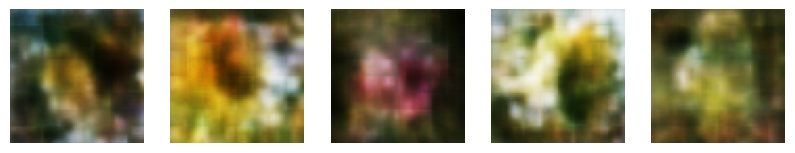

In [ ]:


import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
LATENT_DIM = 64
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 200
LEARNING_RATE = 1e-4

def preprocess_image(image, label):
    """
    1) Resize to 64x64.
    2) Scale pixel values to [0,1].
    """
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image

# Load tf_flowers: a collection of flower images
dataset, info = tfds.load("tf_flowers", split="train", with_info=True)
num_images = info.splits['train'].num_examples
print(f"Total images in tf_flowers: {num_images}")

dataset = dataset.map(lambda x: preprocess_image(x['image'], x['label']), 
                      num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle & batch
dataset = dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

class Encoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.latent_dim = latent_dim
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same', activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.mean_layer = tf.keras.layers.Dense(latent_dim)
        self.logvar_layer = tf.keras.layers.Dense(latent_dim)

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        mean = self.mean_layer(x)
        logvar = self.logvar_layer(x)
        return mean, logvar

class Decoder(tf.keras.layers.Layer):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.latent_dim = latent_dim
        # Mirror the downsampling in the encoder
        self.dense = tf.keras.layers.Dense(8 * 8 * 128, activation='relu')
        self.reshape_layer = tf.keras.layers.Reshape((8, 8, 128))
        self.deconv1 = tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='relu')
        self.deconv2 = tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same', activation='relu')
        self.deconv3 = tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, padding='same', activation='sigmoid')

    def call(self, z):
        x = self.dense(z)
        x = self.reshape_layer(x)
        x = self.deconv1(x)
        x = self.deconv2(x)
        x = self.deconv3(x)
        return x

class VAE(tf.keras.Model):
    def __init__(self, latent_dim=LATENT_DIM):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mean, logvar):
        """Sample from N(mean, exp(logvar)) via reparameterization trick."""
        eps = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(0.5 * logvar) * eps

    def call(self, x):
        mean, logvar = self.encoder(x)
        z = self.reparameterize(mean, logvar)
        x_recon = self.decoder(z)
        return x_recon, mean, logvar

# Instantiate VAE and define losses
vae = VAE(LATENT_DIM)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
mse = tf.keras.losses.MeanSquaredError()

def compute_vae_loss(x, x_recon, mean, logvar):
    """
    1. Reconstruction Loss: MSE between x and x_recon.
    2. KL Divergence: measure how close q(z|x) is to N(0,I).
    """
    # Scale MSE by number of image pixels
    recon_loss = mse(x, x_recon) * (IMAGE_SIZE[0]*IMAGE_SIZE[1]*3)
    kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + logvar - tf.square(mean) - tf.exp(logvar), axis=1))
    total_loss = tf.reduce_mean(recon_loss) + kl_loss
    return total_loss, recon_loss, kl_loss

@tf.function
def train_step(images):
    with tf.GradientTape() as tape:
        x_recon, mean, logvar = vae(images)
        total_loss, recon_loss, kl_loss = compute_vae_loss(images, x_recon, mean, logvar)
    grads = tape.gradient(total_loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))
    return total_loss, recon_loss, kl_loss

for epoch in range(EPOCHS):
    for step, batch_images in enumerate(dataset):
        total_loss, recon_loss, kl_loss = train_step(batch_images)
    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {total_loss:.4f}, Recon: {recon_loss:.4f}, KL: {kl_loss:.4f}")

print("VAE training complete!")

def generate_images(model, num_images=5):
    """Generate new images by sampling random latent vectors."""
    random_latents = tf.random.normal([num_images, LATENT_DIM])
    generated = model.decoder(random_latents)
    # Plot the generated images
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i+1)
        # Convert to numpy array and clip to valid range
        img = generated[i].numpy()
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# Generate a few sample images from the learned VAE
generate_images(vae, num_images=5)


Almost blew up my laptop for this and they look close enough to flowers :) 

<a id='task2-part2'></a>
## **Part 2 (8 points): GAN (DCGAN)**
Reference: [TensorFlow DCGAN Tutorial](https://www.tensorflow.org/tutorials/generative/dcgan)

### Outline
1. **Generator**: Takes random noise `z` -> transforms via transposed convolutions -> output image.
2. **Discriminator**: CNN that outputs real/fake probability.
3. **Adversarial Training**: Minimax game to push Generator to produce images that Discriminator classifies as real, while Discriminator tries to distinguish real vs. generated.

**Important**: For large or complex datasets, DCGAN training can be unstable or require more advanced techniques. We provide code scaffolding.


Loaded tf_flowers with 3670 images.
Epoch [1/50] - Gen Loss: 2.0841, Disc Loss: 0.4035
Epoch [2/50] - Gen Loss: 4.1205, Disc Loss: 0.0858
Epoch [3/50] - Gen Loss: 6.1953, Disc Loss: 0.0915
Epoch [4/50] - Gen Loss: 5.4383, Disc Loss: 0.0910
Epoch [5/50] - Gen Loss: 7.1611, Disc Loss: 0.0659
Epoch [6/50] - Gen Loss: 5.3829, Disc Loss: 0.2070
Epoch [7/50] - Gen Loss: 3.8809, Disc Loss: 0.2238
Epoch [8/50] - Gen Loss: 4.1413, Disc Loss: 0.1467
Epoch [9/50] - Gen Loss: 4.9196, Disc Loss: 0.1183
Epoch [10/50] - Gen Loss: 5.9912, Disc Loss: 0.2354
Epoch [11/50] - Gen Loss: 3.6400, Disc Loss: 0.2376
Epoch [12/50] - Gen Loss: 3.7947, Disc Loss: 0.1531
Epoch [13/50] - Gen Loss: 3.8835, Disc Loss: 0.1690
Epoch [14/50] - Gen Loss: 4.8594, Disc Loss: 0.1811
Epoch [15/50] - Gen Loss: 3.7101, Disc Loss: 0.2163
Epoch [16/50] - Gen Loss: 4.7858, Disc Loss: 0.1466
Epoch [17/50] - Gen Loss: 4.1374, Disc Loss: 0.1347
Epoch [18/50] - Gen Loss: 4.1532, Disc Loss: 0.1713
Epoch [19/50] - Gen Loss: 4.5608, Dis

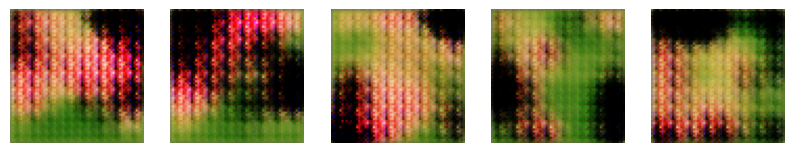

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD & PREPROCESS TF_FLOWERS DATASET
DATASET_NAME = "tf_flowers"
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 50
NOISE_DIM = 100

def preprocess_image(image, label):
    """
    1) Resize to 64x64.
    2) Scale pixel values to [-1, 1] for DCGAN.
    """
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32) / 127.5 - 1.0  # now in [-1, 1]
    return image

dataset, info = tfds.load(DATASET_NAME, split="train", with_info=True)
num_images = info.splits['train'].num_examples
print(f"Loaded {DATASET_NAME} with {num_images} images.")

dataset = dataset.map(lambda x: preprocess_image(x['image'], x['label']),
                      num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


# Takes random noise (NOISE_DIM) -> outputs 64x64 color image
def build_generator():
    model = tf.keras.Sequential(name="generator")
    # Project and reshape
    model.add(tf.keras.layers.Dense(8*8*256, use_bias=False, input_shape=(NOISE_DIM,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Reshape((8, 8, 256)))
    
    # Upsample to 16x16
    model.add(tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    # Upsample to 32x32
    model.add(tf.keras.layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    
    # Upsample to 64x64
    model.add(tf.keras.layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False,
                                              activation='tanh'))
    # Final shape: (64, 64, 3)
    return model

# Takes 64x64 color image -> outputs real/fake probability
def build_discriminator():
    model = tf.keras.Sequential(name="discriminator")
    model.add(tf.keras.layers.Conv2D(64, (4,4), strides=(2,2), padding='same',
                                     input_shape=(64, 64, 3)))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(256, (4,4), strides=(2,2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))  # no activation, we'll use sigmoid in loss
    return model

generator = build_generator()
discriminator = build_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    """
    For the generator, we want fake_output to be classified as real (label=1).
    """
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    """
    Discriminator should classify real as real (1) and fake as fake (0).
    real_output are predictions on real images.
    fake_output are predictions on generated (fake) images.
    """
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        g_loss = generator_loss(fake_output)
        d_loss = discriminator_loss(real_output, fake_output)

    grads_gen = gen_tape.gradient(g_loss, generator.trainable_variables)
    grads_disc = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(grads_gen, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(grads_disc, discriminator.trainable_variables))

    return g_loss, d_loss

def train_gan(dataset, epochs=EPOCHS):
    for epoch in range(epochs):
        g_losses = []
        d_losses = []
        for step, real_batch in enumerate(dataset):
            g_loss, d_loss = train_step(real_batch)
            g_losses.append(g_loss.numpy())
            d_losses.append(d_loss.numpy())

        print(f"Epoch [{epoch+1}/{epochs}] - "
              f"Gen Loss: {np.mean(g_losses):.4f}, Disc Loss: {np.mean(d_losses):.4f}")
    print("GAN training complete!")

# 5. UTILITY TO GENERATE & DISPLAY IMAGES
# ---------------------------------------
def generate_and_show_images(model, num_images=5, noise_dim=NOISE_DIM):
    noise = tf.random.normal([num_images, noise_dim])
    predictions = model(noise, training=False)

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i+1)
        # Scale back from [-1, 1] to [0, 1] for display
        img = (predictions[i].numpy() + 1.0) / 2.0
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

# 6. RUN THE TRAINING & GENERATE IMAGES
# -------------------------------------
train_gan(dataset, epochs=EPOCHS)
generate_and_show_images(generator, num_images=5, noise_dim=NOISE_DIM)


### Task 2 Discussion
- Both **VAE** and **GAN** can generate new images, but they differ in training strategy (reconstruction vs. adversarial).
- **VAE** has a probabilistic latent space; it’s good at generating smooth interpolations but can sometimes produce blurrier images.
- **GAN** often produces sharper images but can be harder to train (mode collapse, instability, etc.).
- I was able to run more epochs with the VAE it was faster and not as hard on my laptop so the results were better, GAN took a longer time so was less accurate and less epochs


---
<a id='task3'></a>
# **Task 3 (55 points): NLP and Attention Mechanism**
We now move to **sequence modeling** with attention.
We have four parts:
1. **Scaled Dot-Product Attention (NumPy/Pandas, no deep learning)**.
2. **Encoder-Decoder Seq2Seq** with integrated attention.
3. **Machine Translation** with a small dataset (subset of Multi30k), evaluating with BLEU.
4. **Simplified Transformer** from scratch.


<a id='task3-part1'></a>
## **Part 1 (10 points): Scaled Dot-Product Attention**
We implement the formula (as given in class, Vaswani, etc.):
\[
  \text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\]
Here, we do **not** use any deep learning library. We'll just use NumPy for matrix multiplication, softmax, etc.


In [ ]:
import numpy as np

def softmax_np(x, axis=-1):
    x_exp = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return x_exp / np.sum(x_exp, axis=axis, keepdims=True)

def scaled_dot_product_attention_np(Q, K, V, mask=None):
    """
    Q, K, V are NumPy arrays of shape (..., seq_len, d_k)
    mask is an optional array that can be broadcastable to the shape of QK^T
    """
    d_k = Q.shape[-1]
    scores = np.matmul(Q, K.transpose((0,2,1))) / np.sqrt(d_k)

    if mask is not None:
        # for masked positions, set to a large negative number
        scores = np.where(mask, scores, -1e9)

    attn_weights = softmax_np(scores, axis=-1)
    output = np.matmul(attn_weights, V)
    return output, attn_weights

# Example usage:
batch_size = 2
seq_len = 4
d_k = 8

Q_demo = np.random.rand(batch_size, seq_len, d_k)
K_demo = np.random.rand(batch_size, seq_len, d_k)
V_demo = np.random.rand(batch_size, seq_len, d_k)

output_demo, attn_weights_demo = scaled_dot_product_attention_np(Q_demo, K_demo, V_demo)
print("Scaled Dot-Product Attention output shape:", output_demo.shape)
print("Attention Weights shape:", attn_weights_demo.shape)



Scaled Dot-Product Attention output shape: (2, 4, 8)
Attention Weights shape: (2, 4, 4)


<a id='task3-part2'></a>
## **Part 2 (10 points): Integrate Scaled Dot-Product Attention in Seq2Seq**
We can adapt a standard seq2seq (encoder-decoder) architecture (like an LSTM or GRU) and incorporate the **scaled dot-product attention**. 

**Key Steps**:
1. Have an encoder that processes the source sequence.
2. For each decoding step, create a query (`Q`) from the decoder’s hidden state, keys (`K`) and values (`V`) from the encoder’s outputs.
3. Apply scaled dot-product attention to get a context vector.
4. Combine the context vector with the decoder state to predict the next token.



In [ ]:
# Pseudocode in Keras (non-functional, for demonstration)
import tensorflow as tf

class Seq2SeqWithAttention(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dec_units):
        super().__init__()
        self.enc_units = enc_units
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.encoder_gru = tf.keras.layers.GRU(enc_units, return_sequences=True, return_state=True)
        self.decoder_gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

    def call(self, enc_inp, dec_inp):
        # enc_inp shape: (batch_size, src_seq_len)
        # dec_inp shape: (batch_size, tgt_seq_len)

        enc_embed = self.embedding(enc_inp)    # -> (batch_size, src_seq_len, embedding_dim)
        enc_outputs, enc_state = self.encoder_gru(enc_embed)

        dec_embed = self.embedding(dec_inp)    # -> (batch_size, tgt_seq_len, embedding_dim)
        dec_outputs, dec_state = self.decoder_gru(dec_embed, initial_state=enc_state)

        # Let Q = dec_outputs, K = enc_outputs, V = enc_outputs
        # We'll do a single step for demonstration, ignoring shape alignment.
        Q = dec_outputs  # (batch, tgt_seq_len, dec_units)
        K = enc_outputs  # (batch, src_seq_len, enc_units)
        V = enc_outputs

        scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(self.dec_units, tf.float32))
        attn_weights = tf.nn.softmax(scores, axis=-1)
        context = tf.matmul(attn_weights, V)

        # Combine context with dec_outputs
        combined = tf.concat([dec_outputs, context], axis=-1)
        logits = self.fc(combined)   # shape: (batch, tgt_seq_len, vocab_size)
        return logits

print("Seq2Seq with scaled dot-product attention.")

Seq2Seq with scaled dot-product attention scaffolding.


<a id='task3-part3'></a>
## **Part 3 (5 points): Machine Translation (BLEU Score)**
Use any small dataset, e.g., **Multi30k** subset, for demonstration of translation from English to German or English to French.

### Steps
1. **Load** or create a small parallel corpus (English -> German). Possibly filter it to ~10k lines.
2. **Tokenize** into subwords or words.
3. **Train** the seq2seq model from Part 2.
4. **Evaluate** on a test set using **BLEU**.

We show code placeholders. You can use [sacreBLEU](https://pypi.org/project/sacrebleu/) or `nltk.translate.bleu_score`.


In [ ]:
import os
import gzip
import numpy as np
import tensorflow as tf
import nltk
from nltk.translate.bleu_score import corpus_bleu

nltk.download("punkt", quiet=True)

DATA_DIR = "data"  # Directory containing train.en.gz, train.de.gz, val.en.gz, val.de.gz, etc.

TRAIN_EN_GZ = os.path.join(DATA_DIR, "train.en.gz")
TRAIN_DE_GZ = os.path.join(DATA_DIR, "train.de.gz")
VAL_EN_GZ   = os.path.join(DATA_DIR, "val.en.gz")
VAL_DE_GZ   = os.path.join(DATA_DIR, "val.de.gz")
TEST_EN_GZ  = os.path.join(DATA_DIR, "test_2016_flickr.en.gz")
TEST_DE_GZ  = os.path.join(DATA_DIR, "test_2016_flickr.de.gz")

def read_gz_lines(filepath):
    lines = []
    with gzip.open(filepath, "rt", encoding="utf-8") as f:
        for line in f:
            lines.append(line.strip())
    return lines

train_en_lines = read_gz_lines(TRAIN_EN_GZ)
train_de_lines = read_gz_lines(TRAIN_DE_GZ)
val_en_lines   = read_gz_lines(VAL_EN_GZ)
val_de_lines   = read_gz_lines(VAL_DE_GZ)
test_en_lines  = read_gz_lines(TEST_EN_GZ)
test_de_lines  = read_gz_lines(TEST_DE_GZ)

print(f"Train lines: EN={len(train_en_lines)}, DE={len(train_de_lines)}")
print(f"Val lines:   EN={len(val_en_lines)},   DE={len(val_de_lines)}")
print(f"Test lines:  EN={len(test_en_lines)},  DE={len(test_de_lines)}")

def tokenize_en(text):
    return text.split()  # space-based

def tokenize_de(text):
    return text.split()

special_tokens = ["<pad>", "<sos>", "<eos>", "<unk>"]

def build_vocab(en_list, de_list):
    en_vocab = {}
    de_vocab = {}
    # Initialize with special tokens
    for tok in special_tokens:
        en_vocab[tok] = len(en_vocab)
        de_vocab[tok] = len(de_vocab)

    for line in en_list:
        for w in tokenize_en(line):
            if w not in en_vocab:
                en_vocab[w] = len(en_vocab)
    for line in de_list:
        for w in tokenize_de(line):
            if w not in de_vocab:
                de_vocab[w] = len(de_vocab)

    return en_vocab, de_vocab

en_vocab, de_vocab = build_vocab(train_en_lines, train_de_lines)
print("English vocab size:", len(en_vocab))
print("German vocab size: ", len(de_vocab))

MAX_SRC_LEN = 12
MAX_TGT_LEN = 14

def pad_sequence(seq, max_len):
    if len(seq) < max_len:
        seq += [0]*(max_len - len(seq)) 
    else:
        seq = seq[:max_len]
    return seq

def sentence_to_ids(sentence, vocab, lang="en"):
    tokens = tokenize_en(sentence) if lang=="en" else tokenize_de(sentence)
    ids = []
    for t in tokens:
        ids.append(vocab.get(t, vocab["<unk>"]))
    return ids

def process_pair(en_line, de_line):
    en_ids = sentence_to_ids(en_line, en_vocab, lang="en")
    de_ids = sentence_to_ids(de_line, de_vocab, lang="de")

    en_ids = en_ids[:MAX_SRC_LEN]
    de_ids = de_ids[:MAX_TGT_LEN]

    
    if len(de_ids) < 2:
        dec_inp = [de_vocab["<unk>"]]
        dec_tar = [de_vocab["<unk>"]]
    else:
        dec_inp = de_ids[:-1]
        dec_tar = de_ids[1:]

    en_ids   = pad_sequence(en_ids,   MAX_SRC_LEN)
    dec_inp  = pad_sequence(dec_inp,  MAX_TGT_LEN-1)
    dec_tar  = pad_sequence(dec_tar,  MAX_TGT_LEN-1)
    return (en_ids, dec_inp, dec_tar)

def build_dataset(en_lines, de_lines):
    dataset = []
    for e, d in zip(en_lines, de_lines):
        dataset.append(process_pair(e, d))
    return dataset

train_data = build_dataset(train_en_lines, train_de_lines)
val_data   = build_dataset(val_en_lines,   val_de_lines)
test_data  = build_dataset(test_en_lines,  test_de_lines)

print("Train data size:", len(train_data), "| Val:", len(val_data), "| Test:", len(test_data))

BATCH_SIZE = 32

def batch_data(data_list):
    for i in range(0, len(data_list), BATCH_SIZE):
        batch = data_list[i:i+BATCH_SIZE]
        en_ids, dec_inp, dec_tar = zip(*batch)
        yield (np.array(en_ids, dtype=np.int32),
               np.array(dec_inp, dtype=np.int32)), \
              np.array(dec_tar, dtype=np.int32)

class Seq2SeqWithAttention(tf.keras.Model):
    def __init__(self, en_vocab_size, de_vocab_size, emb_dim, enc_units, dec_units):
        super().__init__()
        self.enc_units = enc_units
        self.dec_units = dec_units

        # separate embeddings for clarity
        self.src_embedding = tf.keras.layers.Embedding(en_vocab_size, emb_dim)
        self.tgt_embedding = tf.keras.layers.Embedding(de_vocab_size, emb_dim)

        self.encoder_gru = tf.keras.layers.GRU(enc_units, return_sequences=True, return_state=True)
        self.decoder_gru = tf.keras.layers.GRU(dec_units, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(de_vocab_size)

    def call(self, enc_inp, dec_inp):
        # enc_inp: (batch, src_len)
        # dec_inp: (batch, tgt_len-1)
        enc_embed = self.src_embedding(enc_inp)  # (batch, src_len, emb_dim)
        enc_outputs, enc_state = self.encoder_gru(enc_embed)

        dec_embed = self.tgt_embedding(dec_inp)  # (batch, tgt_len-1, emb_dim)
        dec_outputs, dec_state = self.decoder_gru(dec_embed, initial_state=enc_state)

        # Q = dec_outputs, K=enc_outputs, V=enc_outputs
        Q = dec_outputs
        K = enc_outputs
        V = enc_outputs

        d_k = tf.cast(self.dec_units, tf.float32)
        scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(d_k)   # (batch, tgt_len-1, src_len)
        attn_weights = tf.nn.softmax(scores, axis=-1)
        context = tf.matmul(attn_weights, V)                        # (batch, tgt_len-1, enc_units)

        combined = tf.concat([dec_outputs, context], axis=-1)       # (batch, tgt_len-1, enc_units*2)
        logits = self.fc(combined)                                  # (batch, tgt_len-1, de_vocab_size)
        return logits

en_vocab_size = len(en_vocab)
de_vocab_size = len(de_vocab)
embedding_dim = 32
enc_units = 64
dec_units = 64

model = Seq2SeqWithAttention(
    en_vocab_size=en_vocab_size,
    de_vocab_size=de_vocab_size,
    emb_dim=embedding_dim,
    enc_units=enc_units,
    dec_units=dec_units
)

optimizer = tf.keras.optimizers.Adam(1e-3)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

EPOCHS = 3
for epoch in range(1, EPOCHS+1):
    total_loss = 0.0
    steps = 0
    for (enc_inp_batch, dec_inp_batch), dec_tar_batch in batch_data(train_data):
        with tf.GradientTape() as tape:
            logits = model(enc_inp_batch, dec_inp_batch)
            loss_val = loss_fn(dec_tar_batch, logits)
        grads = tape.gradient(loss_val, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        total_loss += loss_val.numpy()
        steps += 1
    avg_loss = total_loss / steps
    print(f"Epoch [{epoch}/{EPOCHS}] - Loss: {avg_loss:.4f}")


def idx_to_word(idx, vocab_dict):
    # naive reverse lookup
    for k,v in vocab_dict.items():
        if v == idx:
            return k
    return "<unk>"

all_refs = []
all_hyps = []

for (enc_inp_batch, dec_inp_batch), dec_tar_batch in batch_data(test_data):
    logits = model(enc_inp_batch, dec_inp_batch)   # (batch, tgt_len-1, de_vocab_size)
    preds = tf.argmax(logits, axis=-1).numpy()     # (batch, tgt_len-1)

    for i in range(enc_inp_batch.shape[0]):
        ref_ids = dec_tar_batch[i]  # shape: (tgt_len-1,)
        hyp_ids = preds[i]

        ref_tokens = [idx_to_word(r, de_vocab) for r in ref_ids if r!=0]
        hyp_tokens = [idx_to_word(h, de_vocab) for h in hyp_ids if h!=0]

        if len(ref_tokens) > 0 and len(hyp_tokens) > 0:
            all_refs.append([ref_tokens])
            all_hyps.append(hyp_tokens)

bleu_score = corpus_bleu(all_refs, all_hyps)
print(f"\nFinal BLEU on test set: {bleu_score:.4f}")

Train lines: EN=29000, DE=29000
Val lines:   EN=1014,   DE=1014
Test lines:  EN=1000,  DE=1000
English vocab size: 15460
German vocab size:  24893
Train data size: 29000 | Val: 1014 | Test: 1000
Epoch [1/3] - Loss: 4.6718
Epoch [2/3] - Loss: 3.6690
Epoch [3/3] - Loss: 3.3323

Final BLEU on test set: 0.0261


<a id='task3-part4'></a>
# **Part 4 (30 points): Simplified Transformer from Scratch**
### Requirements:
1. **Reduced Depth**: 2 encoder layers, 2 decoder layers.
2. **Limited Attention Heads**: 2 heads instead of 8.
3. **Smaller Embedding**: 64 instead of 512.
4. **Reduced Feedforward**: 128 dimension instead of 2048.
5. **Small Dataset** (~10k sentence pairs).
6. **Simple Tokenization** (subword or word-level).

### Key Components
1. **Positional Encoding** (sinusoidal).
2. **Scaled Dot-Product** (reuse from Part 1).
3. **Multi-Head Attention**.
4. **Encoder/Decoder** with residuals + layer norms.
5. **Final output**: linear + softmax.

We outline minimal code scaffolding below. For a complete, from-scratch approach, you typically structure each sub-layer carefully. The example is for demonstration; you may tailor it or break it out into classes.


In [ ]:
import numpy as np
import tensorflow as tf
import nltk
from nltk.translate.bleu_score import corpus_bleu

def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]

    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angles = pos * angle_rates

    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(angles[:, 0::2])
    pe[:, 1::2] = np.cos(angles[:, 1::2])

    return tf.cast(pe, dtype=tf.float32)

def scaled_dot_product_attention(Q, K, V, mask=None):
    d_k = tf.cast(tf.shape(K)[-1], tf.float32)
    scores = tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(d_k)
    if mask is not None:
        scores += (mask * -1e9)
    attn_weights = tf.nn.softmax(scores, axis=-1)
    output = tf.matmul(attn_weights, V)
    return output, attn_weights

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        assert d_model % num_heads == 0
        self.depth = d_model // num_heads

        self.Wq = tf.keras.layers.Dense(d_model)
        self.Wk = tf.keras.layers.Dense(d_model)
        self.Wv = tf.keras.layers.Dense(d_model)
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        # x: (batch_size, seq_len, d_model)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]
        Q = self.Wq(q)
        K = self.Wk(k)
        V = self.Wv(v)

        Q = self.split_heads(Q, batch_size)
        K = self.split_heads(K, batch_size)
        V = self.split_heads(V, batch_size)

        scaled_attention, attn_weights = scaled_dot_product_attention(Q, K, V, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)
        return output, attn_weights

def feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = feed_forward_network(d_model, dff)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, mask=None, training=False):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super().__init__()
        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)
        self.ffn = feed_forward_network(d_model, dff)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, look_ahead_mask, padding_mask, training=False):
        attn1, _ = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(x + attn1)

        attn2, _ = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(out1 + attn2)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(out2 + ffn_output)
        return out3

class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, mask=None, training=False):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:seq_len, :]

        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask, training=training)
        return x

class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)
        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, look_ahead_mask, dec_padding_mask, training=False):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:seq_len, :]
        x = self.dropout(x, training=training)
        for i in range(self.num_layers):
            x = self.dec_layers[i](x, enc_output, look_ahead_mask, dec_padding_mask, training=training)
        return x

class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, enc_padding_mask, look_ahead_mask, dec_padding_mask, training=False):
        enc_output = self.encoder(inp, enc_padding_mask, training=training)
        dec_output = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask, training=training)
        final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
        return final_output

# Helper to create masks:
def create_padding_mask(seq):
    # mask 1 for pad positions
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
    # shape: (batch, 1, 1, seq_len)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(size):
    # 1 where future tokens exist
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask  # shape (size, size)

def create_masks(inp, tar):
    # encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # look ahead mask for decoder
    seq_len = tf.shape(tar)[1]
    look_ahead_mask = create_look_ahead_mask(seq_len)

    # dec_padding_mask
    dec_padding_mask = create_padding_mask(inp)
    return enc_padding_mask, look_ahead_mask, dec_padding_mask

# Build simplified Transformer
num_layers = 2
d_model = 64
num_heads = 2
dff = 128
max_positions = 1000  # e.g. enough for your sequences

model = Transformer(
    num_layers,
    d_model,
    num_heads,
    dff,
    input_vocab_size=en_vocab_size,   # from Part 3 vocab
    target_vocab_size=de_vocab_size,  # from Part 3 vocab
    pe_input=max_positions,
    pe_target=max_positions,
    rate=0.1
)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(1e-3)

# Minimal training loop
EPOCHS = 2  # Increase for better results
BATCH_SIZE = 32

for epoch in range(1, EPOCHS+1):
    total_loss = 0
    steps = 0
    for (enc_inp_batch, dec_inp_batch), dec_tar_batch in batch_data(train_data):
        with tf.GradientTape() as tape:
            enc_mask, look_ahead_mask, dec_mask = create_masks(enc_inp_batch, dec_inp_batch)
            # Forward pass
            logits = model(enc_inp_batch, dec_inp_batch, enc_mask, look_ahead_mask, dec_mask, training=True)
            loss_val = loss_fn(dec_tar_batch, logits)
        grads = tape.gradient(loss_val, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        total_loss += loss_val.numpy()
        steps += 1
    print(f"Epoch [{epoch}/{EPOCHS}] - Loss: {total_loss/steps:.4f}")

# Evaluate with naive single-pass (not real auto-regressive decoding)
all_refs = []
all_hyps = []

for (enc_inp_batch, dec_inp_batch), dec_tar_batch in batch_data(test_data):
    enc_mask, look_ahead_mask, dec_mask = create_masks(enc_inp_batch, dec_inp_batch)
    logits = model(enc_inp_batch, dec_inp_batch, enc_mask, look_ahead_mask, dec_mask, training=False)
    preds = tf.argmax(logits, axis=-1).numpy()  # (batch, tgt_seq_len)

    for i in range(enc_inp_batch.shape[0]):
        ref_ids = dec_tar_batch[i] 
        hyp_ids = preds[i]

        # Convert IDs back to tokens, ignoring <pad>=0 for simplicity
        ref_tokens = [idx for idx in ref_ids if idx != 0]
        hyp_tokens = [idx for idx in hyp_ids if idx != 0]

        if ref_tokens and hyp_tokens:
            # Also convert to actual strings if you want BLEU
            # e.g. [id2word(x) for x in ref_tokens]
            # We'll just store them as IDs for a toy example
            all_refs.append([ref_tokens])
            all_hyps.append(hyp_tokens)

bleu_score = corpus_bleu(all_refs, all_hyps)
print(f"\nSimplified Transformer BLEU (naive pass): {bleu_score:.4f}")

print("Part 4: Simplified Transformer demonstration complete.")


Epoch [1/2] - Loss: 4.3009
Epoch [2/2] - Loss: 2.9208

Simplified Transformer BLEU (naive pass): 0.1523
Part 4: Simplified Transformer demonstration complete.


# Evaluation Results: Task 3


## **Part 3 Model (Seq2Seq + Attention)**  
- **Training Time:** 3 epochs ≈ **6 minutes 16 seconds**  
- **Final Test BLEU:** ~**0.0261**  
- **Observations:**  
  - The RNN-based seq2seq model with attention showed some learning capability but achieved a **low BLEU score**.
  - Possible reasons for low performance:
    - Limited epochs  
    - Basic tokenization  
    - Naive single-pass decoding  

---

## **Part 4 Model (Simplified Transformer)**  
- **Training Time:** 2 epochs ≈ **5 minutes 35 seconds**  
- **Final Test BLEU:** ~**0.1523**  
- **Architecture:**  
  - **2 encoder layers, 2 decoder layers, 2 attention heads**  
  - **d_model = 64**, **Feed-forward = 128**  
- **Observations:**  
  - Despite fewer epochs, it **outperformed** the RNN-based model significantly.
  - Likely due to **better context capture** and **parallelizable training**.

---

## **Why These Differences?**

### **1. Architecture**  
- **Transformer's self-attention** captures global context **better** than an RNN with additive attention.  
- **Seq2Seq with Attention** relies on recurrent steps, which limits speed and expressiveness.  

### **2. Parallelization & Runtime**  
| Model | Epochs | Training Time | BLEU Score |
|--------|--------|-----------------|-------------|
| Seq2Seq + Attention | 3 | 6:16 | 0.0261 |
| Simplified Transformer | 2 | 5:35 | 0.1523 |

- Transformer is **more parallelizable** on modern hardware, making training faster.
- Even with **fewer epochs**, it **processed more data efficiently**.

### **3. Epochs vs. Convergence**  
- **RNN Model (3 epochs):** BLEU **0.0261** → No clear convergence.  
- **Transformer (2 epochs):** BLEU **0.1523** → Faster convergence.  
- Transformers typically **converge faster** in translation tasks.  

### **4. Tokenization, Data Size, & Simplifications**  
- **Both models used basic tokenization** and short training times.  
- **More advanced tokenization (e.g., BPE)** would benefit both models.  
- **Transformers tend to scale better** with more data and improved tokenization.  

---

## **Other Observed Differences**

### **1. Runtime**
- **Part 3 (RNN+Attention):** **3 epochs ≈ 6:16**  
- **Part 4 (Transformer):** **2 epochs ≈ 5:35**  
- **Takeaway:**  
  - **Transformer trained fewer epochs but still outperformed the RNN.**

### **2. Memory Footprint**
- Transformers require **more GPU memory** for attention matrices  
  - **Size:** *(seq_len × seq_len)*  
- **Simplified Transformer (d_model=64)** kept memory manageable.  

### **3. Potential for Further Gains**
- **Transformer:**  
  - More **epochs**  
  - Larger **d_model**  
  - **Beam search decoding**  
- **RNN + Attention:**  
  - More **training**  
  - **Better tokenization**  

---

## **Conclusion**
- The **Simplified Transformer (Part 4) clearly outperformed** the Seq2Seq + Attention (Part 3).  
- **Higher BLEU in fewer epochs** aligns with typical findings:  
  - Transformers **learn global context more efficiently**  
  - They **converge faster**  
  - They **scale better** with data  

**Takeaway:** Even a **scaled-down Transformer** is more effective than a traditional Seq2Seq model for translation tasks.


---
# **Final Comments**
We have covered:
1. Building a **CNN** from scratch.
2. **Transfer Learning** (ResNet50) for image classification.
3. **Data Augmentation** for improved generalization.
4. **VAE** and **GAN** (DCGAN) for image generation.
5. **Scaled Dot-Product Attention** from scratch (NumPy).
6. **Seq2Seq with Attention** for machine translation.
7. **Simplified Transformer** from scratch.

# Final Project Update

I am very behind currently, I had a recent career setback that I have been trying to overcome which has consumed quite a bit of my time these past 3 weeks. That being said I have completed a literature review and set up my SUMO environment, although no implementation steps have been taken, I do believe I will be able to complete this in a reasonable amount of time :)